# Load dataset

In [ ]:
import json

with open("../data/Health_negative_20240128131616/article_1.json", "r", encoding="utf-8") as f:
    article = json.load(f)

print(article.keys())
print(article)

dict_keys(['thread', 'uuid', 'url', 'ord_in_thread', 'parent_url', 'author', 'published', 'title', 'text', 'highlightText', 'highlightTitle', 'highlightThreadTitle', 'language', 'sentiment', 'categories', 'external_links', 'external_images', 'entities', 'rating', 'crawled', 'updated'])
{'thread': {'uuid': 'd2edc371a302addef0a42dcffd042c15cae891d9', 'url': 'https://www.bucksfreepress.co.uk/news/national/24016267.two-people-die-car-collides-ambulance-transporting-elderly-man/', 'site_full': 'www.bucksfreepress.co.uk', 'site': 'bucksfreepress.co.uk', 'site_section': 'https://www.bucksfreepress.co.uk', 'site_categories': ['media'], 'section_title': 'Buckinghamshire News, Sport, Events - Bucks Free Press', 'title': 'Two people die after car collides with ambulance transporting elderly man | Bucks Free Press', 'title_full': 'Two people die after car collides with ambulance transporting elderly man | Bucks Free Press', 'published': '2023-12-28T23:31:00.000+02:00', 'replies_count': 0, 'partici

In [2]:
# Dataset Loader

import os
import json
import pandas as pd

# Folder with your JSON files
folder = "../data/Health_negative_20240128131616"

articles = []

for file in os.listdir(folder):
    if file.endswith(".json"):
        path = os.path.join(folder, file)
        with open(path, "r", encoding="utf-8") as f:
            data = json.load(f)
            
            # Extract only the important fields
            article = {
                "id": data.get("uuid", ""),
                "title": data.get("title", ""),
                "text": data.get("text", ""),
                "author": data.get("author", ""),
                "published": data.get("published", ""),
                "categories": data.get("categories", []),
                "sentiment": data.get("sentiment", "")
            }
            articles.append(article)

# Create a DataFrame
df = pd.DataFrame(articles)

# Show basic info
print(df.shape)       # (rows, columns)
print(df.head(5))     # First 5 articles

(1000, 7)
                                         id  \
0  d1a40a822a0c01e40e351f1f3a11e8f9ab62722b   
1  3c98db7877f507e3d855186ac229b21b675816fb   
2  18ccdc858a47c3f69caf25f8c460690d5104ee5c   
3  39077dab341ac72a7da7088fdd0bd755a1eb47a0   
4  43fd5e7fe5694b25d3a019f13947a55c210bcae3   

                                               title  \
0  Kathleen Wilson's Minnesota dentist did 30 pro...   
1  Muere un anciano y una mujer resulta herida gr...   
2  Patrulla militar en Bucaramanga atropelló a pe...   
3  The Tried And True Method For Jintara Rehab Re...   
4  Department of Health issues rabies alert for T...   

                                                text  \
0  20 fillings, 4 root canals, 8 crowns in one vi...   
1  Un hombre ha muerto y una mujer ha resultado h...   
2  El Ejército lamentó el hecho.\nEl animal fue a...   
3  The Tried And True Method For Jintara Rehab Re...   
4  JACKSONVILLE, Fla. — A rabies alert has been i...   

                         author  

# Preprocessing

1. Tokenize
2. Lowercase
3. Remove stopwords
4. Stemming / Lemmatization
5. Remove punctuation
6. Inverted Index
7. TF-IDF

In [3]:
import nltk
from nltk.corpus import stopwords

# Add the parent folder that contains 'corpora'
nltk.data.path.append("../data/nltk_data")

# Load English stopwords
stop_words = set(stopwords.words("english"))

print(f"Loaded {len(stop_words)} stopwords. Sample: {list(stop_words)[:10]}")

Loaded 198 stopwords. Sample: ["mustn't", "don't", 'herself', "he's", 're', 'at', 'no', 'that', 'both', "they'll"]


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_text(text):
    if not isinstance(text, str):  # Handle NaN or non-string
        return ""
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove punctuation / special chars
    text = re.sub(r"[^a-z\s]", " ", text)
    
    # 3. Tokenize
    words = text.split()
    
    # 4. Remove stopwords
    words = [w for w in words if w not in stop_words]
    
    # 5. Stemming
    words = [stemmer.stem(w) for w in words]
    
    # 6. Join back
    return " ".join(words)

# Apply to dataframe
df["clean_text"] = df["text"].apply(preprocess_text)

print(df[["text", "clean_text"]].head(3))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kushagra/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  \
0  20 fillings, 4 root canals, 8 crowns in one vi...   
1  Un hombre ha muerto y una mujer ha resultado h...   
2  El Ejército lamentó el hecho.\nEl animal fue a...   

                                          clean_text  
0  fill root canal crown one visit add lawsuit mi...  
1  un hombr ha muerto una mujer ha resultado heri...  
2  el ej rcito lament el hecho el anim fue atendi...  


# Word Frequency Analysis + Plots

[('de', 7217), ('la', 4452), ('que', 3181), ('en', 2661), ('n', 2526), ('el', 2493), ('lo', 2190), ('said', 2149), ('http', 1372), ('health', 1306), ('un', 1246), ('one', 1237), ('wilson', 1218), ('medic', 1215), ('molldrem', 1211), ('year', 1137), ('com', 1124), ('also', 1091), ('se', 1082), ('del', 1072)]


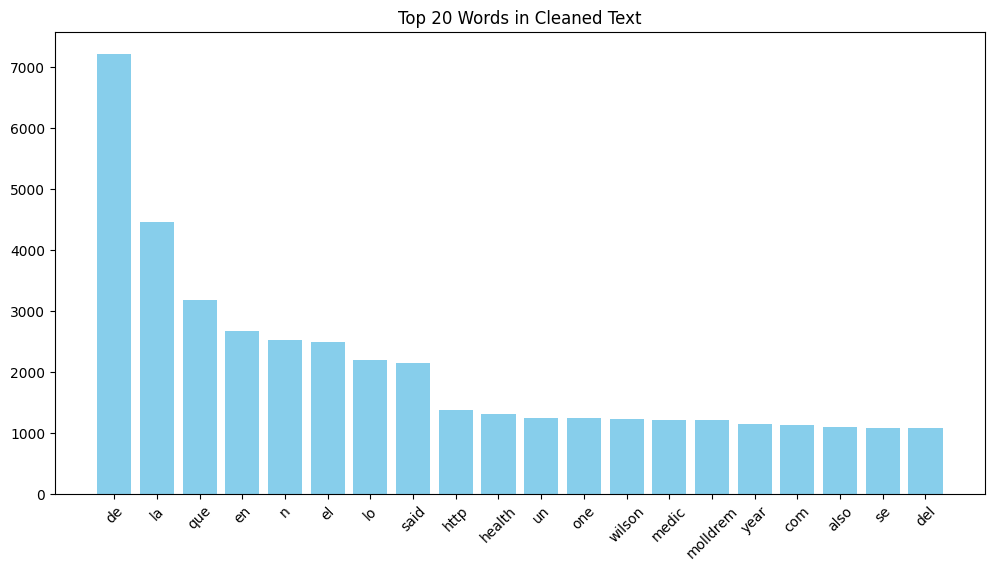

In [ ]:
# Word Frequency Analysis in Python
from collections import Counter
import matplotlib.pyplot as plt

# Combine all cleaned text
all_text = " ".join(df["clean_text"])
words = all_text.split()
word_freq = Counter(words)

# Top 20 words
top_words = word_freq.most_common(20)
print(top_words)

# Plot
words_plot, counts_plot = zip(*top_words)
plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Words in Cleaned Text")
plt.show()

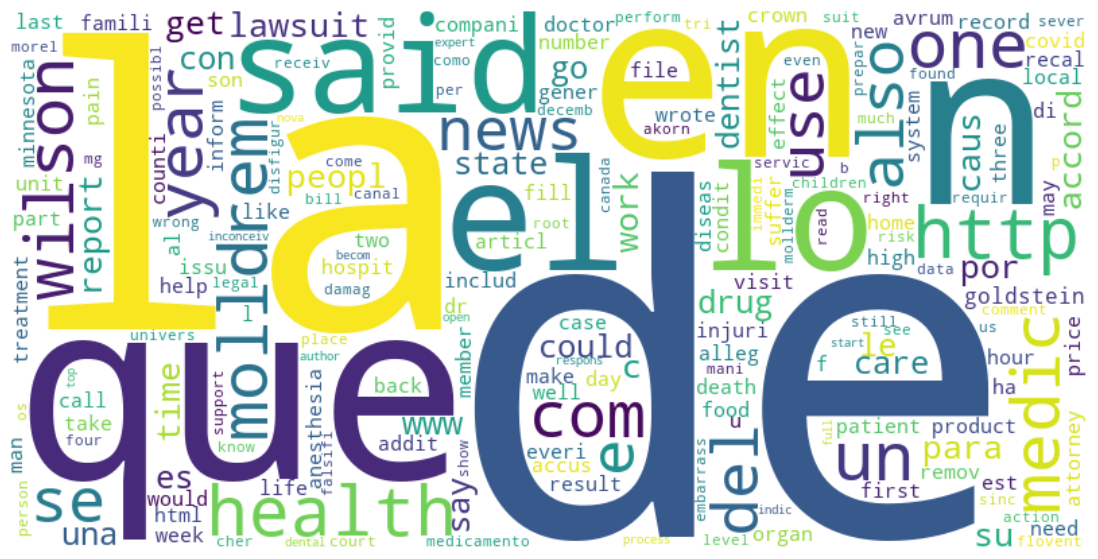

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Indexing into Elasticsearch

In [18]:
from elasticsearch import Elasticsearch, helpers
import pandas as pd

# Connect to ES
es = Elasticsearch("http://localhost:9200")

index_name = "health_news"

# Check/create index
mapping = {
    "mappings": {
        "properties": {
            "id": {"type": "keyword"},
            "title": {"type": "text"},
            "text": {"type": "text"},
            "clean_text": {"type": "text"},
            "author": {"type": "keyword"},
            "published": {"type": "date"},
            "categories": {"type": "keyword"},
            "sentiment": {"type": "keyword"}
        }
    }
}

if not es.indices.exists(index=index_name):
    es.indices.create(index=index_name, body=mapping)
    print("Index created!")
else:
    print("Index already exists.")

# Prepare actions for bulk
actions = [
    {
        "_index": index_name,
        "_id": row["id"],
        "_source": {
            "id": row["id"],
            "title": row["title"],
            "text": row["text"],
            "clean_text": row["clean_text"],
            "author": row["author"],
            "published": row["published"],
            "categories": row["categories"],
            "sentiment": row["sentiment"]
        }
    }
    for _, row in df.iterrows()
]

# Bulk index
helpers.bulk(es, actions)
print("Indexing done!")

Index already exists.
Indexing done!


In [27]:
# Checking document count
es.count(index="health_news")

ObjectApiResponse({'count': 1000, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}})

In [28]:
# Sample retrieval
res = es.search(index="health_news", query={"match_all": {}})
print(res['hits']['hits'][:5])

[{'_index': 'health_news', '_id': 'd1a40a822a0c01e40e351f1f3a11e8f9ab62722b', '_score': 1.0, '_source': {'id': 'd1a40a822a0c01e40e351f1f3a11e8f9ab62722b', 'title': "Kathleen Wilson's Minnesota dentist did 30 procedures at once: lawsuit", 'text': '20 fillings, 4 root canals, 8 crowns in one visit add up to lawsuit for Minnesota dentist [Mary Walrath-Holdridge](https://www.usatoday.com/staff/12093029002/mary-walrathholdridge/) A Minnesota dentist has become the subject of a malpractice lawsuit after his patient accused him of "disfiguring" her. The civil lawsuit was filed in Hennepin County, Minnesota last week by Kathleen Wilson, who alleged Dr. Kevin Molldrem and [Molldrem Family Dentistry](https://molldremdentistry.com/) caused her significant injury that is still being corrected. According to the suit, Molldrem performed more than 30 producers on Wilson in a single July 2020 visit, doing eight crowns, four root canals and 20 fillings in one go. The lawsuit alleges that the dentist "p

# Validate Elasticsearch index

In [29]:
from elasticsearch import Elasticsearch
import time

es = Elasticsearch("http://localhost:9200")
index_name = "health_news"

# 1. Total documents
doc_count = es.count(index=index_name)['count']
print(f"Total documents in index: {doc_count}")

# 2. Sample retrieval (first 5 docs)
res = es.search(index=index_name, query={"match_all": {}}, size=5)
for hit in res['hits']['hits']:
    print(hit['_source']['title'])

# 3. Test specific queries
queries = ["covid vaccine", "health", "flu", "rabies alert"]
for q in queries:
    res = es.search(index=index_name, query={"match": {"clean_text": q}}, size=3)
    print(f"\nTop 3 results for query: '{q}'")
    for hit in res['hits']['hits']:
        print(f"- {hit['_source']['title']}")

Total documents in index: 1000
Kathleen Wilson's Minnesota dentist did 30 procedures at once: lawsuit
Muere un anciano y una mujer resulta herida grave en un accidente de coche en Níjar | Andalucía Información. Todas las noticias de Cádiz
Patrulla militar en Bucaramanga atropelló a perrita callejera y huyó sin darle ayuda
The Tried And True Method For Jintara Rehab Reviews In Step By Step Detail
Department of Health issues rabies alert for Town Center/UNF area in Jacksonville – 104.5 WOKV

Top 3 results for query: 'covid vaccine'
- COVID-19 In Bulgaria: 118 New Cases In The Last 24 Hours
- Delhi Health Minister assesses Covid preparedness amid rising JN.1 variant cases across country
- Flu, COVID and RSV on the rise in Cook County heading into 2024

Top 3 results for query: 'health'
- Ground News - Another death reported since 2021 recall of home bed assist handles: Health Canada
- Rift over when to use N95s puts health workers at risk again
- Health system breach exposes 1M patients' 

In [30]:
# Latency (A)
import numpy as np

query_set = ["covid vaccine", "health", "flu", "rabies alert", "dentist", "root canal", 
                "hospital", "disease outbreak", "pandemic", "virus spread"]

latencies = []

for q in query_set:
    start = time.time()
    es.search(index=index_name, query={"match": {"clean_text": q}}, size=5)
    end = time.time()
    latencies.append(end - start)

latencies_ms = [t*1000 for t in latencies]  # milliseconds
print("Latencies (ms):", latencies_ms)
print(f"p95: {np.percentile(latencies_ms, 95):.2f} ms")
print(f"p99: {np.percentile(latencies_ms, 99):.2f} ms")

Latencies (ms): [15.074014663696289, 21.253108978271484, 5.371809005737305, 5.707025527954102, 6.461143493652344, 78.3390998840332, 5.7659149169921875, 6.236076354980469, 2.5200843811035156, 5.835056304931641]
p95: 52.65 ms
p99: 73.20 ms


In [31]:
# Throughput (B)
num_runs = 100
start = time.time()
for _ in range(num_runs):
    for q in query_set:
        es.search(index=index_name, query={"match": {"clean_text": q}}, size=5)
end = time.time()

total_queries = len(query_set) * num_runs
throughput = total_queries / (end - start)  # queries per second
print(f"Throughput: {throughput:.2f} queries/sec")

Throughput: 309.07 queries/sec


In [32]:
# Memory footprint (C)
import psutil

# If running ES locally (not Docker), you can monitor the process memory
for proc in psutil.process_iter(['pid', 'name', 'memory_info']):
    if "elasticsearch" in proc.info['name'].lower():
        mem = proc.info['memory_info'].rss / (1024**2)  # MB
        print(f"Elasticsearch process memory: {mem:.2f} MB")

In [33]:
# Functional metrics (D)
# Example gold standard: expected doc IDs for query "covid vaccine"
gold_standard = {
    "covid vaccine": ["id1", "id2", "id3"],  # replace with actual IDs from your dataset
    "flu": ["id5", "id6"]
}

def precision_recall(query, top_k=5):
    res = es.search(index=index_name, query={"match": {"clean_text": query}}, size=top_k)
    retrieved = [hit['_id'] for hit in res['hits']['hits']]
    relevant = gold_standard.get(query, [])

    tp = len(set(retrieved) & set(relevant))
    precision = tp / len(retrieved) if retrieved else 0
    recall = tp / len(relevant) if relevant else 0
    return precision, recall

for q in gold_standard.keys():
    p, r = precision_recall(q)
    print(f"Query: {q} -> Precision: {p:.2f}, Recall: {r:.2f}")

Query: covid vaccine -> Precision: 0.00, Recall: 0.00
Query: flu -> Precision: 0.00, Recall: 0.00


Latency (ms) -> p95: 8.72, p99: 9.83


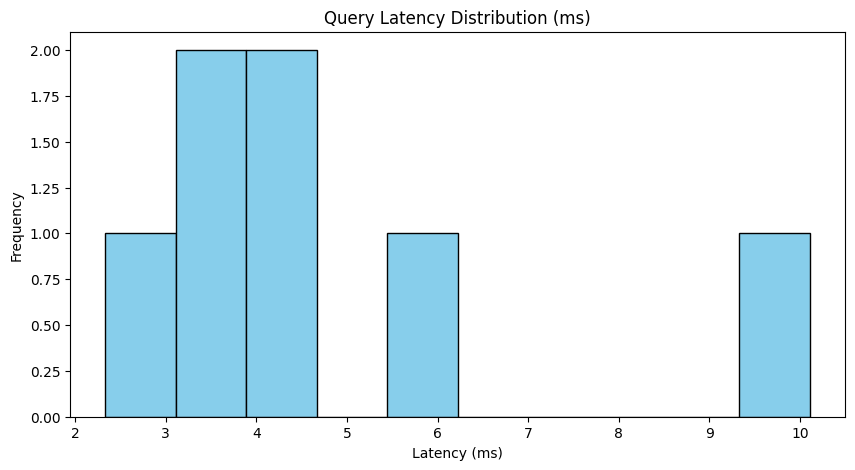

Throughput: 404.93 queries/sec
Elasticsearch process not found for memory measurement.
Query: covid -> Precision: 0.20, Recall: 0.10
Query: health -> Precision: 0.00, Recall: 0.00
Query: dentist -> Precision: 1.00, Recall: 0.50
Query: flu OR health -> Precision: 0.00, Recall: 0.00


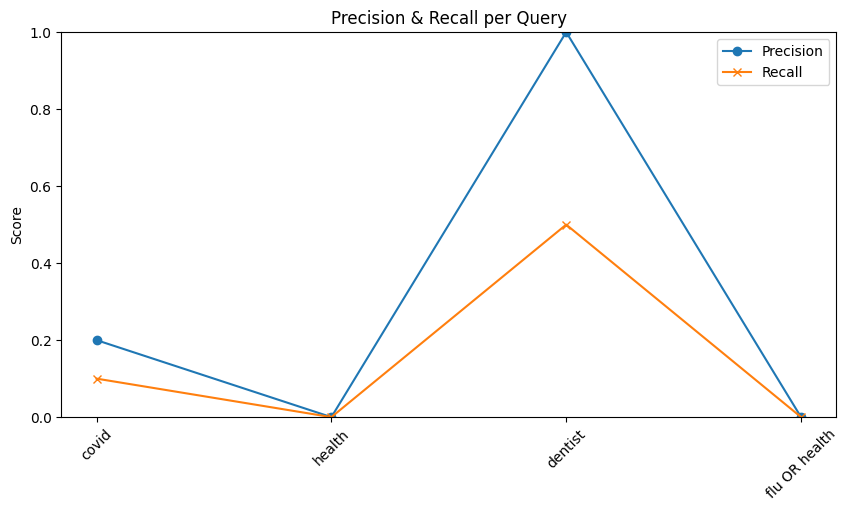

In [72]:
import time
import numpy as np
import matplotlib.pyplot as plt
import psutil
from elasticsearch import Elasticsearch

def evaluate_elasticsearch(es, index_name, query_set, gold_standard=None, top_k=5, num_runs=10):
    """
    Evaluate Elasticsearch index: latency (p95/p99), throughput, memory, precision/recall.
    
    Args:
        es: Elasticsearch client
        index_name: name of the index
        query_set: list of query strings
        gold_standard: dict {query: [relevant_doc_ids]}, optional
        top_k: number of top documents to retrieve per query
        num_runs: number of runs to compute throughput
    """
    
    # --- A: Latency ---
    latencies = []
    for q in query_set:
        start = time.time()
        es.search(index=index_name, query={"match": {"clean_text": q}}, size=top_k)
        end = time.time()
        latencies.append(end - start)
    
    latencies_ms = [t*1000 for t in latencies]
    p95 = np.percentile(latencies_ms, 95)
    p99 = np.percentile(latencies_ms, 99)
    print(f"Latency (ms) -> p95: {p95:.2f}, p99: {p99:.2f}")
    
    # Plot latency distribution
    plt.figure(figsize=(10,5))
    plt.hist(latencies_ms, bins=10, color='skyblue', edgecolor='black')
    plt.title("Query Latency Distribution (ms)")
    plt.xlabel("Latency (ms)")
    plt.ylabel("Frequency")
    plt.show()
    
    # --- B: Throughput ---
    total_queries = len(query_set) * num_runs
    start = time.time()
    for _ in range(num_runs):
        for q in query_set:
            es.search(index=index_name, query={"match": {"clean_text": q}}, size=top_k)
    end = time.time()
    throughput = total_queries / (end - start)
    print(f"Throughput: {throughput:.2f} queries/sec")
    
    # --- C: Memory footprint ---
    mem_usage = None
    for proc in psutil.process_iter(['name', 'memory_info']):
        if "elasticsearch" in proc.info['name'].lower():
            mem_usage = proc.info['memory_info'].rss / (1024**2)  # MB
            print(f"Memory footprint: {mem_usage:.2f} MB")
            break
    if mem_usage is None:
        print("Elasticsearch process not found for memory measurement.")
    
    # --- D: Precision & Recall ---
    if gold_standard:
        def pr(query):
            res = es.search(index=index_name, query={"match": {"clean_text": query}}, size=top_k)
            retrieved = [hit['_id'] for hit in res['hits']['hits']]
            relevant = gold_standard.get(query, [])
            tp = len(set(retrieved) & set(relevant))
            precision = tp / len(retrieved) if retrieved else 0
            recall = tp / len(relevant) if relevant else 0
            return precision, recall
        
        precisions, recalls = [], []
        for q in gold_standard.keys():
            p, r = pr(q)
            precisions.append(p)
            recalls.append(r)
            print(f"Query: {q} -> Precision: {p:.2f}, Recall: {r:.2f}")
        
        # Plot Precision & Recall
        plt.figure(figsize=(10,5))
        plt.plot(list(gold_standard.keys()), precisions, marker='o', label="Precision")
        plt.plot(list(gold_standard.keys()), recalls, marker='x', label="Recall")
        plt.xticks(rotation=45)
        plt.ylim(0,1)
        plt.title("Precision & Recall per Query")
        plt.ylabel("Score")
        plt.legend()
        plt.show()

# -------------------
# Example usage
# -------------------

es = Elasticsearch("http://localhost:9200")
index_name = "health_news"

query_set = ["covid vaccine", "health", "flu", "rabies alert", "dentist", "flu OR health", "dentist NOT molldrem"]

gold_standard = {}

queries = ["covid", "health", "dentist", "flu OR health"]

for q in queries:
    terms = q.split()
    relevant_ids = []
    
    for i, row in df.iterrows():
        text = str(row["clean_text"]).lower()
        if all(term in text for term in terms):  # all query words must appear
            relevant_ids.append(row["id"])
    
    gold_standard[q] = relevant_ids[:10]  # take top 10 matches max

evaluate_elasticsearch(es, index_name, query_set, gold_standard=gold_standard, top_k=5, num_runs=5)

import json

with open("gold_standard.json", "w") as f:
    json.dump(gold_standard, f, indent=2)